In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
df_user_rank = pd.read_csv('./data/df_user_rank.csv')
df_user_info = pd.read_csv('./data/df_user_info.csv')

In [83]:
df_user = pd.merge(df_user_info,df_user_rank,left_on='additionalName',right_on='username',how='left')
df_user['year_start'] = df_user['year_start'].fillna(df_user['year_start'].max() + 1)

In [84]:
df_user.head()

,name,additionalName,bio,org,label,email,link_url,count_ogz,year_start,count_repositories,count_projects,count_stars,count_followers,count_following,username,rank_num,star_num
0,Sindre Sorhus,sindresorhus,Full-Time Open-Sourcerer ·· Maker ·· Into Swif...,ʵ̎̐ˡ̐̎ʵ̎̐ˌ̐̎̐ ˌ̐̎ˌ̎̐̎ˌ̐̎̐̎ˌ̎̐̎ˌ̐̎ˌ̎ ˌ̎̐̎ˌ̐̎̐̎ˌ...,⎹⎹⎸⎸⎸⎹⎸⎹⎸⎹⎸⎹⎸⎹⎹⎸⎸⎹⎹⎸⎸⎹⎹⎸⎸⎸⎹⎸⎹⎸⎸⎸⎸⎹⎸⎹⎸⎹⎸⎹⎸⎹⎹⎸⎸⎹...,Sign in to view email,https://sindresorhus.com,24,2009.0,998,0,2.7k,32.4k,54,sindresorhus,1,386144
1,NaN,996icu,NaN,NaN,NaN,NaN,NaN,1,2019.0,1,0,1,7.1k,0,996icu,2,240955
2,Kamran Ahmed,kamranahmedse,Lover of all things web and opensource. Coding...,tajawal,"Dubai, UAE",Sign in to view email,http://twitter.com/kamranahmedse,2,2013.0,50,0,1.2k,8.7k,114,kamranahmedse,3,128058
3,Kyle Simpson,getify,I teach JavaScript and I'd love to come help y...,Getify Solutions,"Austin, TX",Sign in to view email,NaN,0,2009.0,50,0,366,20.8k,1,getify,4,121162
4,Donne Martin,donnemartin,Engineering Manager @facebook. twitter.com/don...,@facebook,"Washington, D.C.",Sign in to view email,http://donnemartin.com/,1,2013.0,27,0,1k,7.1k,4,donnemartin,5,120460


In [54]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
name                  970 non-null object
additionalName        1000 non-null object
bio                   564 non-null object
org                   598 non-null object
label                 885 non-null object
email                 650 non-null object
link_url              860 non-null object
count_ogz             1000 non-null int64
year_start            999 non-null float64
count_repositories    1000 non-null object
count_projects        1000 non-null int64
count_stars           1000 non-null object
count_followers       1000 non-null object
count_following       1000 non-null object
username              1000 non-null object
rank_num              1000 non-null int64
star_num              1000 non-null int64
dtypes: float64(1), int64(4), object(12)
memory usage: 140.6+ KB


## 分布图

In [86]:
lst_cols_count = ['count_ogz','year_start','count_repositories','count_projects','count_stars','count_followers','count_following','star_num']
len_count = len(lst_cols_count)

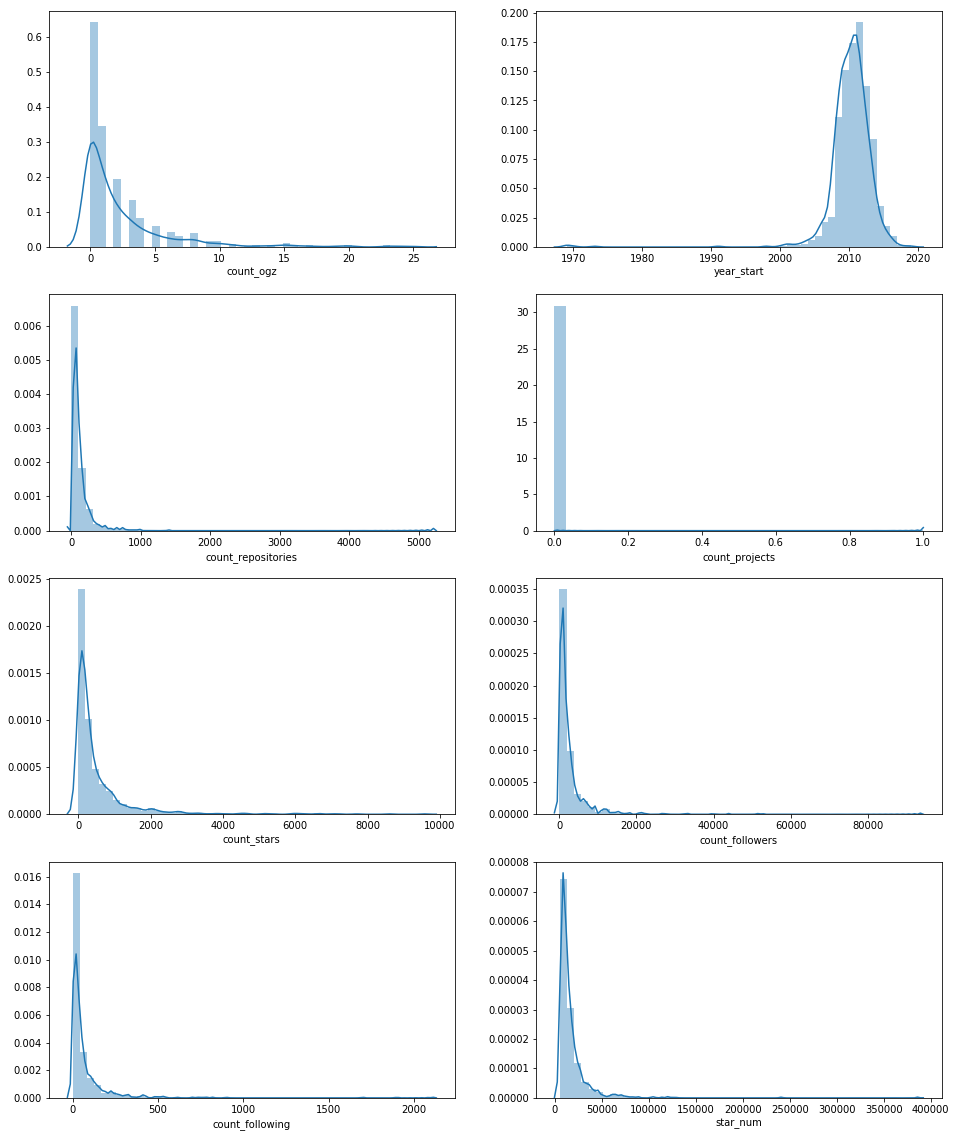

In [85]:
plt.figure(figsize=(16,20))

for i in range(len_count):
    col = lst_cols_count[i]
    df_user[col] = df_user[col].apply(lambda x:float(str(x)[:-1])*1000 if 'k' in str(x) else x).astype(int)
    plt.subplot(4,2,i+1)
    sns.distplot(df_user[col])
plt.show()

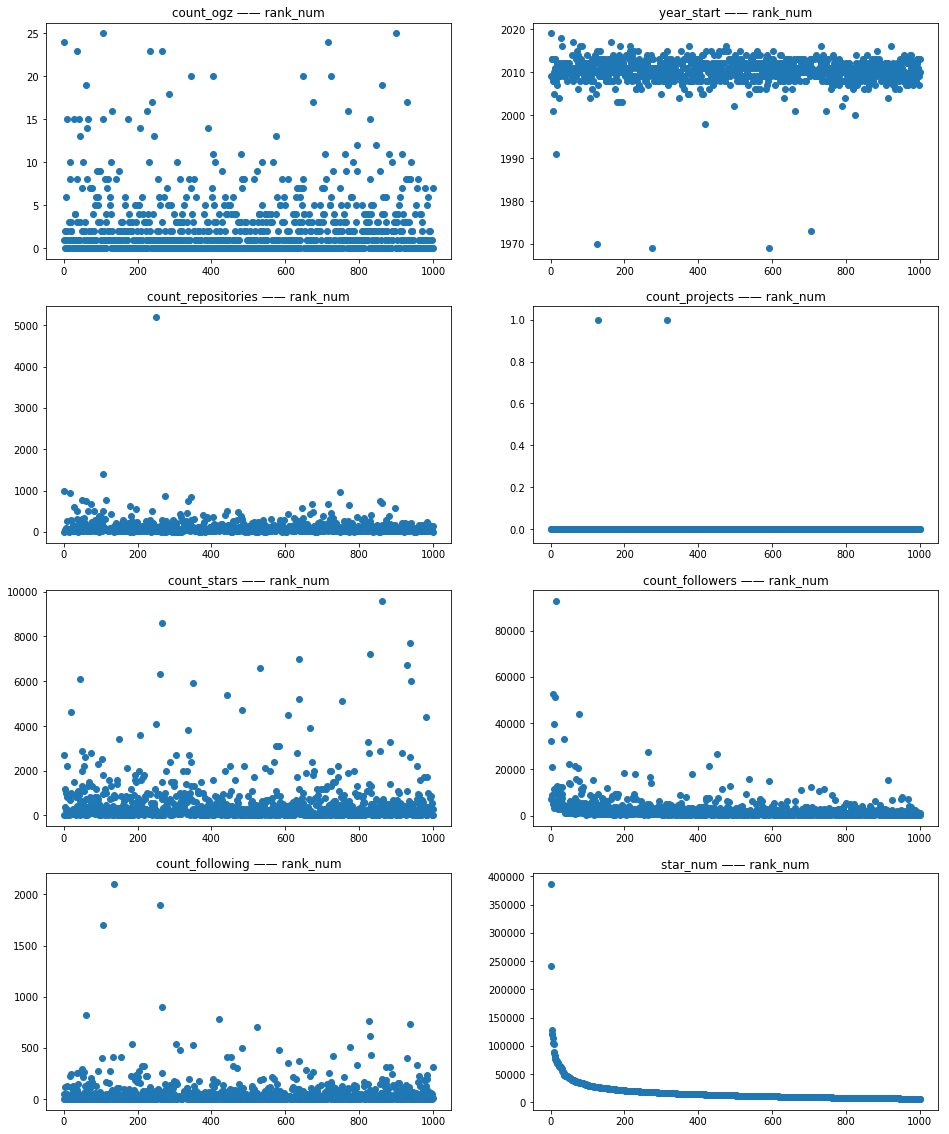

In [100]:
plt.figure(figsize=(16,20))

for i in range(len_count):
    col = lst_cols_count[i]
    df_user[col] = df_user[col].apply(lambda x:float(str(x)[:-1])*1000 if 'k' in str(x) else x).astype(int)
    plt.subplot(4,2,i+1)
    plt.scatter(df_user['rank_num'],df_user[col])
    plt.title(col+' —— rank_num')
plt.show()

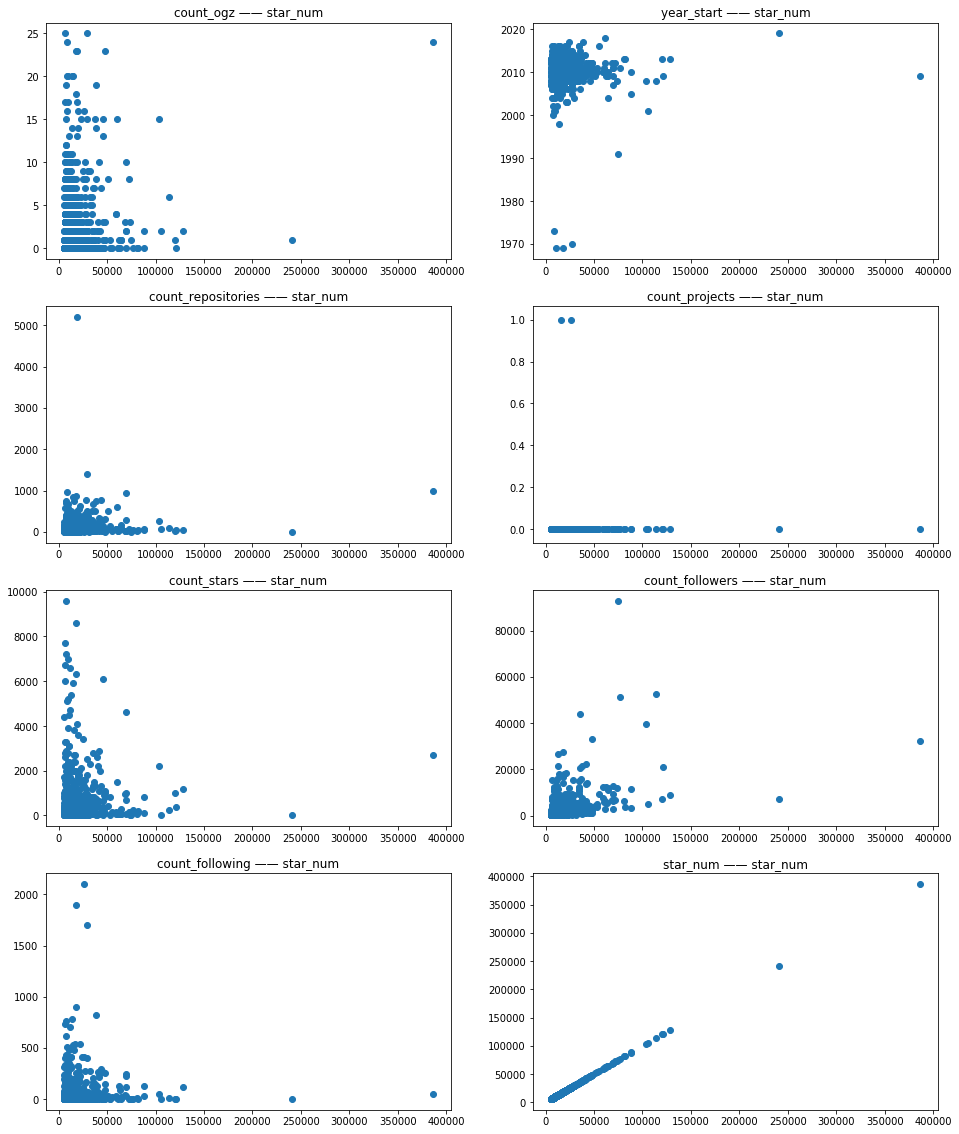

In [101]:
plt.figure(figsize=(16,20))

for i in range(len_count):
    col = lst_cols_count[i]
    df_user[col] = df_user[col].apply(lambda x:float(str(x)[:-1])*1000 if 'k' in str(x) else x).astype(int)
    plt.subplot(4,2,i+1)
    plt.scatter(df_user['star_num'],df_user[col])
    plt.title(col+' —— star_num')
plt.show()